# 摘要
本文通过聚合函数将七张不同的美国纽约高中sat相关数据信息合并,并进行数据的压缩与清洗,最终得到干净的总表,进行数据可视化分析.  
我们将着眼于美国高中生的SAT 成绩以及其他统计数据来做数据分析。SAT(Scholastic Aptitude Test)是美国高中生申请大学前参加的一项考试。大学在作出是否入取决定时会参考考试成绩。这个考试分为三个部分，每部分 800 分，总分 2400 (虽然总分曾改来改去很多次，但在这个数据集里仍是2400)。各高中经常以 SAT 的平均成绩进行排名，SAT 成绩高代表着这个学区的高品质。  
有人提出 SAT 对美国的某些种族人群不公平，因此对纽约市的数据进行分析可以帮组我们进一步搞清楚 SAT 考试的公平性。  
  
#本笔记灵感思路出自dataquestio创立者Vik Paruchuri

## 1 准备工作
### 1.1 数据来源
本文数据均来自NYC OpenData https://opendata.cityofnewyork.us/  
### 1.2 纽约市学区介绍
纽约市有五个区，各自是独立的区域。  
所有学校分布在各个学区里，每个区包含数十个学校。  
数据集里的学校并非都是高中，因此我们需要做一些数据清理工作。  
每所有学校都有一个DBN (District Borough Number)唯一编号。  
通过聚合每个区的数据，我们可以绘制出各个区域之间的差异。 
### 1.3 数据介绍
2012_SAT_Results.csv – 纽约市每所高中的 SAT 成绩。  
2010_-_2011_School_Attendance_and_Enrollment_Statistics_by_District.csv – 纽约市每所学校的招生数据。  
2006_-_2011_NYS_Math_Test_Results_By_Grade_-_School_Level_-_All_Students.csv – 纽约市每所学校的数学测试成绩。  
2010-2011_Class_Size_-_School-level_detail.csv – 纽约市每所学校班级规模数据。  
2010__AP__College_Board__School_Level_Results.csv – AP（Advanced Placement）考试成绩，通过 AP 考试可以获得大学学分。  
2005-2010_Graduation_Outcomes_-_School_Level.csv – 毕业学生比例，以及其他信息。  
2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv – 每所学校的生源统计信息。  
### 1.4 导入数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#数据写入,以字典形式保存
files = [
    "2010__AP__College_Board__School_Level_Results.csv",
    "2010-2011_Class_Size_-_School-level_detail.csv",
    "2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv",
    "2005-2010_Graduation_Outcomes_-_School_Level.csv",
    "2010_-_2011_School_Attendance_and_Enrollment_Statistics_by_District.csv",
    "2006_-_2011_NYS_Math_Test_Results_By_Grade_-_School_Level_-_All_Students.csv",
    "2012_SAT_Results.csv"
]

data = {}
for f in files:
    d = pd.read_csv(f)
    data[f.replace(".csv", "")] = d

In [4]:
#使用.items()函数将字典转化为元组,遍历后显示,观察数据特征
for k,v in data.items():
    print("\n" + '>>>' + k + "\n")
    print(v.head())


>>>2010__AP__College_Board__School_Level_Results

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  

>>>2010-2011_Class_Size_-_School-level_detail

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Robert

## 2 数据统一
主要思路:通过重复出现次数最多的DBN列进行多文件的聚合,同时整理每张表格,删去无用信息,并聚合DBN重复的数据

In [5]:
AP = data['2010__AP__College_Board__School_Level_Results'].copy()
AP

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


In [6]:
data['2010_-_2011_School_Attendance_and_Enrollment_Statistics_by_District']

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,DISTRICT 01,91.18,12367
1,DISTRICT 02,89.01,60823
2,DISTRICT 03,89.28,21962
3,DISTRICT 04,91.13,14252
4,DISTRICT 05,89.08,13170
5,DISTRICT 06,91.34,25733
6,DISTRICT 07,86.75,19717
7,DISTRICT 08,87.15,31625
8,DISTRICT 09,89.27,34518
9,DISTRICT 10,88.92,56757


In [7]:
data['2010-2011_Class_Size_-_School-level_detail']

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN


In [8]:
#class_size文件中并没有DBN,但发现一个有趣的现象,class_size中的CSD,SCHOOL_CODE组合后即为DBN
#使用匿名函数将两列格式化输出组合
data["2010-2011_Class_Size_-_School-level_detail"]["DBN"] = data["2010-2011_Class_Size_-_School-level_detail"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)

In [9]:
#由于class_size中一个DBN对应了很多数据,因此无法有效的和其他数据集组合起来,因此考虑数据的压缩
#按DBN进行group,计算每个列的平均值,得到每所学校平均的class_size值.
data["2010-2011_Class_Size_-_School-level_detail"].isnull().sum()

CSD                                         0
BOROUGH                                     0
SCHOOL CODE                                 0
SCHOOL NAME                                 0
GRADE                                    1484
PROGRAM TYPE                             1484
CORE SUBJECT (MS CORE and 9-12 ONLY)     1484
CORE COURSE (MS CORE and 9-12 ONLY)      1484
SERVICE CATEGORY(K-9* ONLY)              1484
NUMBER OF STUDENTS / SEATS FILLED        1484
NUMBER OF SECTIONS                       1484
AVERAGE CLASS SIZE                       1484
SIZE OF SMALLEST CLASS                   1484
SIZE OF LARGEST CLASS                    1484
DATA SOURCE                              1484
SCHOOLWIDE PUPIL-TEACHER RATIO          26127
DBN                                         0
dtype: int64

In [10]:
class_size = data["2010-2011_Class_Size_-_School-level_detail"].copy()
class_size.drop(['CSD','BOROUGH','SCHOOL CODE','SCHOOLWIDE PUPIL-TEACHER RATIO'],axis = 1,inplace = True)
class_size.dropna(inplace = True)

In [11]:
class_size

,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,DBN
0,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,01M015
1,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,01M015
2,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,01M015
3,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,01M015
4,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,01M015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27605,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Global History & Geography,-,237.0,10.0,23.7,15.0,31.0,STARS,32K564
27606,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,32K564
27607,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,32K564
27608,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,32K564


In [12]:
class_size.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26127 entries, 0 to 27609
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SCHOOL NAME                           26127 non-null  object 
 1   GRADE                                 26127 non-null  object 
 2   PROGRAM TYPE                          26127 non-null  object 
 3   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 4   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 5   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 6   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  float64
 7   NUMBER OF SECTIONS                    26127 non-null  float64
 8   AVERAGE CLASS SIZE                    26127 non-null  float64
 9   SIZE OF SMALLEST CLASS                26127 non-null  float64
 10  SIZE OF LARGEST CLASS                 26127 non-null  float64
 11  DATA SOURCE         

In [13]:
class_size.columns = [i.strip() for i in class_size.columns]

In [14]:
class_size = class_size[class_size["GRADE"] == "09-12"]    #只保留年级为9-12的
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]    #只保留Gen Ed的

In [15]:
f = class_size.groupby('DBN')

In [16]:
class_size = f[[
    'AVERAGE CLASS SIZE',
    'NUMBER OF STUDENTS / SEATS FILLED',
    'NUMBER OF SECTIONS',
    'SIZE OF SMALLEST CLASS',
    'SIZE OF LARGEST CLASS'
]].mean().reset_index()

In [17]:
class_size

,DBN,AVERAGE CLASS SIZE,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS
0,01M292,22.564286,88.000000,4.000000,18.500000,26.571429
1,01M332,22.000000,46.000000,2.000000,21.000000,23.500000
2,01M378,33.000000,33.000000,1.000000,33.000000,33.000000
3,01M448,22.231250,105.687500,4.750000,18.250000,27.062500
4,01M450,21.200000,57.600000,2.733333,19.400000,22.866667
...,...,...,...,...,...,...
578,32K549,22.760000,71.066667,3.266667,19.866667,25.866667
579,32K552,23.900000,102.375000,4.312500,19.937500,28.000000
580,32K554,17.793750,66.937500,3.812500,14.750000,21.625000
581,32K556,25.060000,132.333333,5.400000,18.333333,30.000000


In [18]:
data["2006_-_2012_School_Demographics_and_Accountability_Snapshot"].head(10)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


In [19]:
#demographics为本文相当重要的一个数据集,包含了学校的人口种族信息,但首先得去除无用的数据,比如其他的年份,只保留2011年和2012年
demographics = data["2006_-_2012_School_Demographics_and_Accountability_Snapshot"].copy()
demographics = demographics[demographics["schoolyear"] == 20112012]
demographics = demographics.drop('fl_percent',axis = 1)

In [20]:
demographics

,DBN,Name,schoolyear,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,89.4,189,13,31,35,28,25,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,61.5,328,32,46,52,54,52,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,92.5,626,52,102,121,87,88,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,99.7,401,14,34,38,36,45,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,78.9,176,18,20,30,21,31,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,20112012,75.1,434,,,,,,...,123,28.3,298,68.7,8,1.8,210.0,48.4,224.0,51.6
10053,32K552,ACADEMY OF URBAN PLANNING,20112012,77.1,398,,,,,,...,105,26.4,280,70.4,4,1.0,217.0,54.5,181.0,45.5
10060,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20112012,81.4,263,,,,,,...,34,12.9,209,79.5,4,1.5,137.0,52.1,126.0,47.9
10067,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20112012,88.0,462,,,,,,...,98,21.2,357,77.3,0,0.0,246.0,53.2,216.0,46.8


In [21]:
# 对数学成绩压缩,只保留2011年的全年级成绩
math_result = data['2006_-_2011_NYS_Math_Test_Results_By_Grade_-_School_Level_-_All_Students'].copy()
math_result = math_result[(math_result['Grade']=='All Grades')&(math_result['Year']==2011)]
math_result

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
24,01M015,All Grades,2011,All Students,81,669.0,18.0,22.2,35.0,43.2,26.0,32.1,2.0,2.5,28.0,34.6
50,01M019,All Grades,2011,All Students,112,683.0,4.0,3.6,46.0,41.1,48.0,42.9,14.0,12.5,62.0,55.4
75,01M020,All Grades,2011,All Students,258,682.0,19.0,7.4,87.0,33.7,109.0,42.2,43.0,16.7,152.0,58.9
117,01M034,All Grades,2011,All Students,246,673.0,25.0,10.2,84.0,34.1,104.0,42.3,33.0,13.4,137.0,55.7
142,01M063,All Grades,2011,All Students,77,689.0,4.0,5.2,26.0,33.8,24.0,31.2,23.0,29.9,47.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,75X186,All Grades,2011,All Students,219,621.0,147.0,67.1,55.0,25.1,17.0,7.8,0.0,0.0,17.0,7.8
28375,75X188,All Grades,2011,All Students,119,623.0,79.0,66.4,31.0,26.1,7.0,5.9,2.0,1.7,9.0,7.6
28410,75X352,All Grades,2011,All Students,118,635.0,64.0,54.2,45.0,38.1,9.0,7.6,0.0,0.0,9.0,7.6
28436,75X721,All Grades,2011,All Students,9,635.0,5.0,55.6,4.0,44.4,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# 对毕业数据进行压缩,只保留2006年和Total Cohort的数据
graduation = data['2005-2010_Graduation_Outcomes_-_School_Level'].copy()
graduation = graduation[(graduation['Demographic']=='Total Cohort')&(graduation['Cohort']=='2006')]
graduation

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,Total Cohort,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,2006,97,74,76.3,59,60.8,79.7,...,54,55.7,73.0,15,15.5,20.3,12,12.4,9,9.3
2489,Total Cohort,32K552,ACADEMY OF URBAN PLANNING,2006,115,55,47.8,41,35.7,74.5,...,40,34.8,72.7,14,12.2,25.5,44,38.3,10,8.7
2495,Total Cohort,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,2006,43,36,83.7,23,53.5,63.9,...,18,41.9,50.0,13,30.2,36.1,5,11.6,2,4.7
2502,Total Cohort,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACAD,2006,117,65,55.6,28,23.9,43.1,...,23,19.7,35.4,37,31.6,56.9,24,20.5,22,18.8


In [23]:
sat_result = data['2012_SAT_Results'].copy()
display(sat_result.info())
sat_result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


None

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


In [24]:
# 观察sat数据后发现该数据集没有总分列,因此需要我们手动计算
cols = ['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']
for c in cols:
    sat_result[c] = pd.to_numeric(sat_result[c],errors='coerce')
sat_result['total'] = sat_result['SAT Critical Reading Avg. Score'] + sat_result['SAT Math Avg. Score'] + sat_result['SAT Writing Avg. Score']

In [25]:
sat_result

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,total
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0
...,...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,NaN,NaN,NaN,NaN
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,NaN,NaN,NaN,NaN
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,NaN,NaN,NaN,NaN
476,79Q950,GED PLUS s CITYWIDE,8,496.0,400.0,426.0,1322.0


## 3 数据合并

In [26]:
data_new = {0:sat_result,1:graduation,2:demographics,3:class_size,4:AP}

In [27]:
names = [k for k,v in data_new.items()]
df = [data_new[k] for k in names]
full = df[0]
for i in names: 
    join_type = 'inner'
    if i in [0,1,4]:
        join_type = 'outer'
    full = pd.merge(full,df[i],on = 'DBN',how = join_type)
full

,DBN,SCHOOL NAME_x,Num of SAT Test Takers_x,SAT Critical Reading Avg. Score_x,SAT Math Avg. Score_x,SAT Writing Avg. Score_x,total_x,SCHOOL NAME_y,Num of SAT Test Takers_y,SAT Critical Reading Avg. Score_y,...,female_per,AVERAGE CLASS SIZE,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,...,38.6,22.564286,88.000000,4.000000,18.500000,26.571429,NaN,NaN,NaN,NaN
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,...,42.6,22.231250,105.687500,4.750000,18.250000,27.062500,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY SCHOOL,70,377.0,...,45.3,21.200000,57.600000,2.733333,19.400000,22.866667,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,FORSYTH SATELLITE ACADEMY,7,414.0,...,56.7,23.000000,28.600000,1.200000,22.600000,23.400000,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,MARTA VALLE HIGH SCHOOL,44,390.0,...,53.7,23.571429,69.642857,3.000000,20.000000,27.357143,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348.0,353.0,334.0,1035.0,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348.0,...,51.6,22.760000,71.066667,3.266667,19.866667,25.866667,NaN,NaN,NaN,NaN
436,32K552,ACADEMY OF URBAN PLANNING,67,342.0,364.0,354.0,1060.0,ACADEMY OF URBAN PLANNING,67,342.0,...,45.5,23.900000,102.375000,4.312500,19.937500,28.000000,Academy of Urban Planning,76.0,100.0,10.0
437,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,465.0,422.0,1315.0,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,...,47.9,17.793750,66.937500,3.812500,14.750000,21.625000,All City Leadership Secondary School,7.0,8.0,NaN
438,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347.0,358.0,350.0,1055.0,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347.0,...,46.8,25.060000,132.333333,5.400000,18.333333,30.000000,Bushwick Leaders High School for Academic Exce...,34.0,35.0,18.0


In [28]:
len(full['DBN'].unique())

439

In [29]:
full.drop_duplicates(['DBN'],inplace = True)

In [30]:
full = full.drop(['SchoolName'],axis = 1)

In [31]:
full = full.drop(full.iloc[:,7:13],axis = 1)

In [32]:
# 补全数据
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for c in cols:
    full[c] = pd.to_numeric(full[c],errors = 'coerce')
    full[c] = full[c].fillna(0)

In [33]:
full.columns

Index(['DBN', 'SCHOOL NAME_x', 'Num of SAT Test Takers_x',
       'SAT Critical Reading Avg. Score_x', 'SAT Math Avg. Score_x',
       'SAT Writing Avg. Score_x', 'total_x', 'Demographic', 'School Name',
       'Cohort', 'Total Cohort', 'Total Grads - n',
       'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort', 'Name', 'schoolyear', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'e

## 4 数据分析及可视化

In [34]:
# 根据corr可看出每列和其他列的相关系数,方便进行之后的可视化
full.corr(numeric_only=True)['total_x'].sort_values(ascending = False)
# 与总录取人数有很强的相关性。这有点令我们惊讶，在我们的认知中，越小的学校，应该越注重于学生教育，分数应该更高才对。
# 女性百分比（female_per）与 SAT 成绩成正比，男性比例(male_per) 则相反。
# SAT 成绩中有显著的种族不平等性(white_per, asian_per, black_per, hispanic_per)

total_x                                 1.000000
SAT Writing Avg. Score_x                0.981751
SAT Critical Reading Avg. Score_x       0.976819
SAT Math Avg. Score_x                   0.956406
Advanced Regents - % of cohort          0.804798
Advanced Regents - % of grads           0.767437
Total Regents - % of cohort             0.657891
white_per                               0.646568
AP Test Takers                          0.577195
Total Exams Taken                       0.565228
Number of Exams with scores 3 4 or 5    0.562624
Total Grads - % of cohort               0.560168
asian_per                               0.552204
Total Regents - % of grads              0.492126
asian_num                               0.483939
white_num                               0.460505
female_num                              0.403581
NUMBER OF STUDENTS / SEATS FILLED       0.400095
AVERAGE CLASS SIZE                      0.395964
total_enrollment                        0.385741
NUMBER OF SECTIONS  

In [35]:
x = [x for x,y in dict(full.corr(numeric_only=True)['total_x'][["white_per", "asian_per", "black_per", "hispanic_per"]]).items()]
y = [y for x,y in dict(full.corr(numeric_only=True)['total_x'][["white_per", "asian_per", "black_per", "hispanic_per"]]).items()]

<BarContainer object of 4 artists>

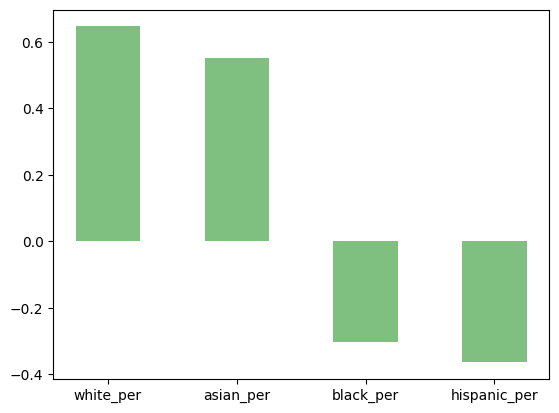

In [43]:
plt.bar(x,y,width = 0.5,color = 'g',alpha = 0.5)

<BarContainer object of 2 artists>

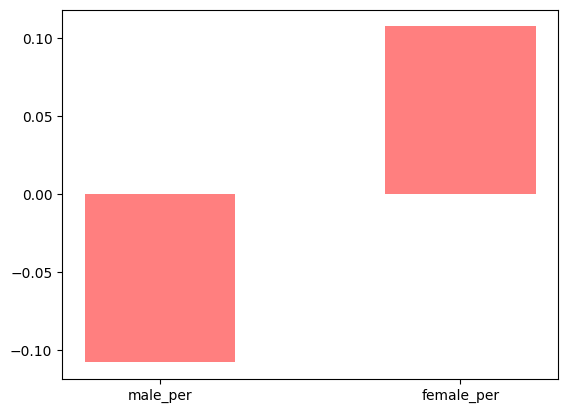

In [45]:
x = [x for x,y in dict(full.corr(numeric_only=True)['total_x'][["male_per", "female_per"]]).items()]
y = [y for x,y in dict(full.corr(numeric_only=True)['total_x'][["male_per", "female_per"]]).items()]
plt.bar(x,y,width = 0.5,color = 'r',alpha = 0.5)

### 英语学生的比例
从中可以看出，英语学生比例低的学区，SAT 成绩一般比较高，反之亦然。

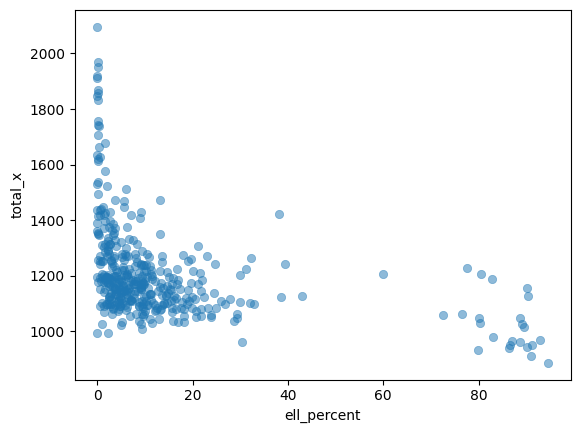

In [443]:
# plt.figure(figsize=(9,5),   # (宽度 , 高度) 单位inch 
#            dpi=120,         #  清晰度 dot-per-inch
# #            facecolor='#CCCCCC', # 画布底色
# #            edgecolor='black',linewidth=0.2,frameon=True, # 画布边框
#            #frameon=False  # 不要画布边框
#           )   

plt.scatter(full['ell_percent'],full['total_x'],linewidth = 0.5,alpha = 0.5)    #绘制散点图
plt.xlabel("ell_percent")
plt.ylabel("total_x")
plt.show()

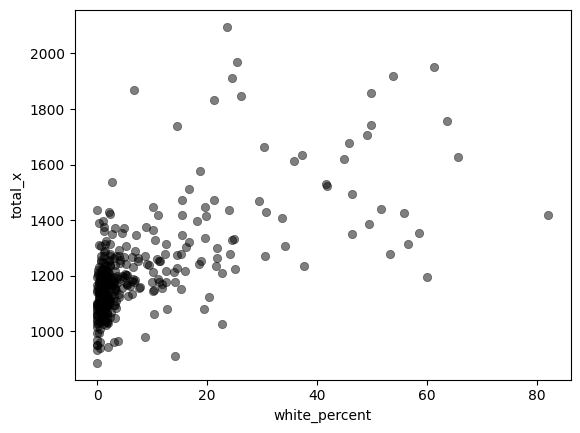

In [438]:
plt.scatter(full['white_per'],full['total_x'],linewidth = 0.5,alpha = 0.5,c = 'k')    #绘制散点图
plt.xlabel("white_percent")
plt.ylabel("total_x")
plt.show()

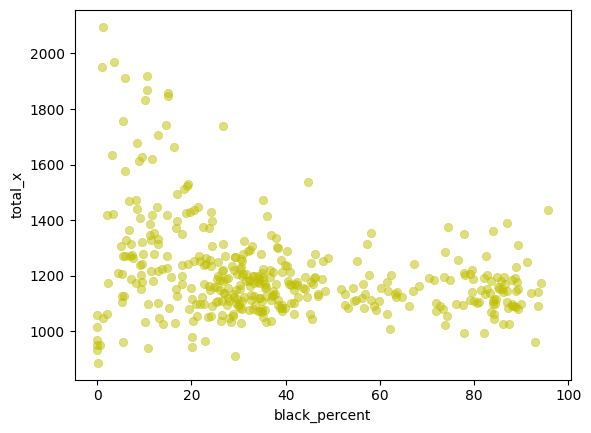

In [440]:
plt.scatter(full['black_per'],full['total_x'],linewidth = 0.5,alpha = 0.5,c = 'y')    #绘制散点图
plt.xlabel("black_percent")
plt.ylabel("total_x")
plt.show()